In [1]:
import librosa
from scipy.signal import stft, istft
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment

from ipywidgets import interactive

# change phase

In [2]:
default_rate = 44100

In [3]:
def numpy_to_audio_segment(audio_arr, amp=1.0, rate=default_rate, channels=1, sample_width=4):
    audio_arr = audio_arr / (abs(audio_arr).max())
    audio_arr_trans = ((2**(8*sample_width-1)-1) * amp * audio_arr).astype(np.int32)
    audio_segment = AudioSegment(audio_arr_trans.tobytes(),
                                 frame_rate=rate,
                                 sample_width=sample_width,
                                 channels=channels)
    return audio_segment

In [4]:
piano_path = './data/2322_6sec.wav'

In [5]:
piano_arr, piano_sr = librosa.load(piano_path, sr=None)
print(piano_arr.shape, piano_sr)

(374378,) 44100


In [6]:
window_n = int(piano_sr * 0.03)

In [7]:
fq_piano, t_piano, fq_amp_piano = stft(piano_arr, fs=piano_sr, nperseg=window_n)

In [8]:
spec_piano = abs(fq_amp_piano)
phase_piano = fq_amp_piano / abs(fq_amp_piano)

In [9]:
i_t_piano, i_piano_arr = istft(fq_amp_piano, fs=piano_sr, nperseg=window_n)
i_t_piano, i_piano_no_phase_arr = istft(spec_piano, fs=piano_sr, nperseg=window_n)

In [12]:
numpy_to_audio_segment(i_piano_no_phase_arr)

In [13]:
numpy_to_audio_segment(i_piano_arr)

In [14]:
numpy_to_audio_segment(piano_arr)

In [10]:
def plot_signals(t_sec, t_intvl=0.3):
    t_idx_start = (i_t_piano < t_sec).sum()
    t_idx_end = t_idx_start + int(t_intvl / i_t_piano[1])
    plt.figure(figsize=(12, 9))
    plt.plot(i_piano_no_phase_arr[t_idx_start: t_idx_end], label='no phase', alpha=0.5)
    plt.plot(i_piano_arr[t_idx_start: t_idx_end], label='inverse', alpha=0.5)
    plt.plot(piano_arr[t_idx_start: t_idx_end], label='original', alpha=0.5)
    plt.legend()

In [11]:
interactive(plot_signals, t_sec=(0, i_t_piano[-1], i_t_piano[1]), t_intvl=(0, 1, 0.01))

interactive(children=(FloatSlider(value=4.248208616780046, description='t_sec', max=8.496417233560091, step=2.…

# inst phase

In [141]:
x = np.arange(100000)
y = np.sin(np.pi * x / 999)

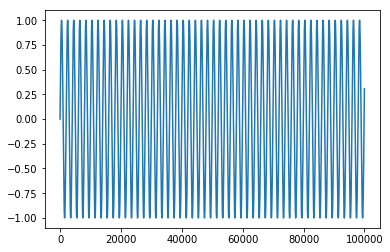

In [124]:
plt.plot(y)

In [125]:
fq, t, fq_amp = stft(y, nperseg=1200, window='boxcar')

In [126]:
spec = abs(fq_amp)
phase_angle = np.angle(fq_amp)

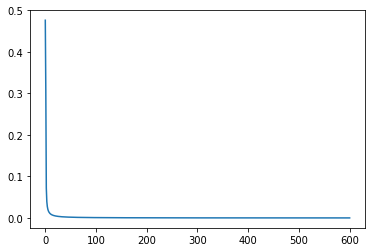

In [142]:
plt.plot(spec[:,11])

In [128]:
np.unique(np.argmax(spec, axis=0))

array([0, 1])

In [129]:
spec_peak_idx = np.argmax(spec, axis=0)

In [130]:
spec.shape, spec_peak_idx.shape

((601, 168), (168,))

In [131]:
fq.shape

(601,)

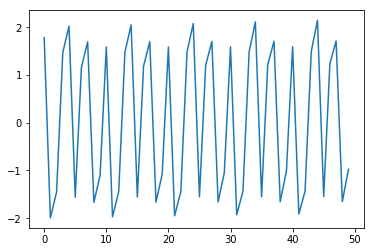

In [132]:
plt.plot(phase_angle[4,:50])

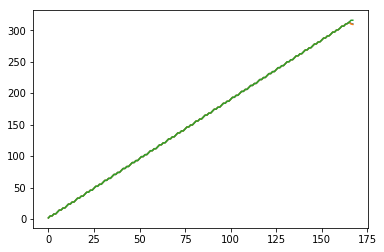

In [133]:
plt.plot(np.unwrap(phase_angle)[62,:])
plt.plot(np.unwrap(phase_angle)[61,:])
plt.plot(np.unwrap(phase_angle)[60,:])

In [137]:
phase_diff = (np.unwrap(phase_angle)[4,20] - np.unwrap(phase_angle)[4,120])/(100)

In [138]:
phase_diff

-1.885244540438189

In [140]:
phase_diff / 600 *  (999/np.pi)

-0.9991531385339953